In [190]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sbs
import numpy as np

pd.options.display.max_rows
pd.options.display.max_columns

20

In [191]:
df = pd.read_csv('salary_data_cleaned.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,python_,R_,spark_,aws_,excel_,private,avg_revenue,avg_size,age,Rating
0,DATA SCIENTIST,$54K-$92K\n(Glassdoor est.),JOB SUMMARY\n\nThe position will focus on buil...,Blessing Hospital\n3.8,"Quincy, IL",-1,1001 to 5000 Employees,1875,Nonprofit Organization,Health Care Services & Hospitals,...,1,0,0,1,1,0,3.000000e+08,3000.5,145.0,3.8
1,Sr. Data Scientist - Model Governance,$101K-$163K\n(Glassdoor est.),General Summary:\n\nThe position plays a criti...,Elevate Credit\n3.6,"Addison, TX",-1,501 to 1000 Employees,2014,Company - Public,Lending,...,1,0,0,0,0,0,3.000000e+08,750.5,6.0,3.6
2,R&D Scientist,$31K-$72K\n(Glassdoor est.),Our Research and Development department is on ...,Chobani\n4.3,"Twin Falls, ID",-1,1001 to 5000 Employees,2005,Company - Private,Food & Beverage Manufacturing,...,0,0,0,1,1,1,1.500000e+09,3000.5,15.0,4.3
3,Manufacturing Scientist,$41K-$91K\n(Glassdoor est.),Biomerica Corporation focusing on the research...,Biomerica\n2.5,"Irvine, CA",-1,1 to 50 Employees,-1,Company - Public,Biotech & Pharmaceuticals,...,0,0,0,0,1,0,7.500000e+06,25.5,12.5,2.5
4,HCM Data Analyst,$55K-$94K\n(Glassdoor est.),Any qualified individual with a disability who...,Austal USA\n3.2,"Mobile, AL",-1,1001 to 5000 Employees,1988,Company - Public,Industrial Manufacturing,...,0,0,0,0,1,0,1.500000e+09,3000.5,32.0,3.2


In [192]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'python_', 'R_', 'spark_', 'aws_', 'excel_',
       'private', 'avg_revenue', 'avg_size', 'age', 'Rating'],
      dtype='object')

In [193]:
def title_extraction(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'data scientist'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'director' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 1
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 0
    else:
        return 0

In [194]:
df['job_simp'] = df['Job Title'].apply(title_extraction)
df.job_simp.value_counts()

data scientist    450
analyst           152
mle                84
data engineer      59
manager            15
director           10
Name: job_simp, dtype: int64

In [195]:
dummy_df = pd.get_dummies(df.job_simp)

In [196]:
dummy_df.head()

,analyst,data engineer,data scientist,director,manager,mle
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [197]:
dummy_df.shape

(770, 6)

In [198]:
new_df = pd.concat([df, dummy_df], axis=1)

In [199]:
new_df.shape

(770, 37)

In [200]:
new_df.head()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,...,avg_size,age,Rating,job_simp,analyst,data engineer,data scientist,director,manager,mle
0,DATA SCIENTIST,$54K-$92K\n(Glassdoor est.),JOB SUMMARY\n\nThe position will focus on buil...,Blessing Hospital\n3.8,"Quincy, IL",-1,1001 to 5000 Employees,1875,Nonprofit Organization,Health Care Services & Hospitals,...,3000.5,145.0,3.8,data scientist,0,0,1,0,0,0
1,Sr. Data Scientist - Model Governance,$101K-$163K\n(Glassdoor est.),General Summary:\n\nThe position plays a criti...,Elevate Credit\n3.6,"Addison, TX",-1,501 to 1000 Employees,2014,Company - Public,Lending,...,750.5,6.0,3.6,data scientist,0,0,1,0,0,0
2,R&D Scientist,$31K-$72K\n(Glassdoor est.),Our Research and Development department is on ...,Chobani\n4.3,"Twin Falls, ID",-1,1001 to 5000 Employees,2005,Company - Private,Food & Beverage Manufacturing,...,3000.5,15.0,4.3,data scientist,0,0,1,0,0,0
3,Manufacturing Scientist,$41K-$91K\n(Glassdoor est.),Biomerica Corporation focusing on the research...,Biomerica\n2.5,"Irvine, CA",-1,1 to 50 Employees,-1,Company - Public,Biotech & Pharmaceuticals,...,25.5,12.5,2.5,data scientist,0,0,1,0,0,0
4,HCM Data Analyst,$55K-$94K\n(Glassdoor est.),Any qualified individual with a disability who...,Austal USA\n3.2,"Mobile, AL",-1,1001 to 5000 Employees,1988,Company - Public,Industrial Manufacturing,...,3000.5,32.0,3.2,analyst,1,0,0,0,0,0


In [201]:
new_df['seniority'] = new_df['Job Title'].apply(seniority)
new_df.seniority.value_counts()

0    615
1    155
Name: seniority, dtype: int64

In [202]:
new_df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
new_df['desc_len'].value_counts()

4777    8
2668    7
4429    7
2481    6
5877    5
       ..
3677    1
5726    1
3694    1
4564    1
3078    1
Name: desc_len, Length: 454, dtype: int64

In [203]:
new_df.job_state.value_counts()

 CA    199
 VA     82
 NY     73
 MA     68
 MD     48
 IL     33
 FL     26
 OH     24
 TX     20
 WA     19
 DC     19
 NC     15
 AZ     13
 PA     12
 MN     11
 CO     11
 MO     11
 TN     11
 AL      9
 NJ      8
 GA      7
 MI      7
 WI      7
 CT      5
 SC      5
 IN      4
 IA      4
 OR      3
 KS      3
 NM      3
 UT      2
 MS      2
 DE      1
 AR      1
 ID      1
 RI      1
 ND      1
 WY      1
Name: job_state, dtype: int64

In [204]:
new_df['Competitors'].value_counts()

-1    770
Name: Competitors, dtype: int64

In [205]:
new_df['min_salary'] = new_df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
new_df['max_salary'] = new_df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [206]:
new_df[new_df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
49,1,40,56
376,1,108,184
399,1,108,184
553,1,108,184
557,1,90,110


In [207]:
new_df['company_txt'] = new_df.company_txt.apply(lambda x: x.replace('\n', ''))
new_df['company_txt']

0                        Blessing Hospital
1                           Elevate Credit
2                                  Chobani
3                                Biomerica
4                               Austal USA
                      ...                 
765                     Medidata Solutions
766                           Fortego, LLC
767    Designer Brands (DSW, Camuto Group)
768                          PA Consulting
769                                Waystar
Name: company_txt, Length: 770, dtype: object

In [208]:
new_df.describe()

,Headquarters,Founded,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,python_,R_,...,age,Rating,analyst,data engineer,data scientist,director,manager,mle,seniority,desc_len
count,770.0,770.000000,770.0,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,...,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,-1.0,1848.763636,-1.0,0.006494,0.016883,79.089610,130.290909,104.309740,0.640260,0.009091,...,44.857887,3.783050,0.197403,0.076623,0.584416,0.012987,0.019481,0.109091,0.201299,3870.663636
std,0.0,484.282810,0.0,0.080372,0.128917,29.247138,42.501845,35.372528,0.480236,0.094974,...,41.763659,0.536181,0.398297,0.266166,0.493143,0.113292,0.138296,0.311956,0.401231,1587.744694
min,-1.0,-1.000000,-1.0,0.000000,0.000000,12.000000,51.000000,24.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,327.000000
25%,-1.0,1945.000000,-1.0,0.000000,0.000000,56.000000,98.000000,77.125000,0.000000,0.000000,...,15.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2711.500000
50%,-1.0,1988.000000,-1.0,0.000000,0.000000,77.000000,127.000000,102.000000,1.000000,0.000000,...,27.000000,3.800000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3760.000000
75%,-1.0,2005.000000,-1.0,0.000000,0.000000,97.000000,155.000000,126.375000,1.000000,0.000000,...,62.000000,4.100000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4795.000000
max,-1.0,2019.000000,-1.0,1.000000,1.000000,180.000000,286.000000,233.000000,1.000000,1.000000,...,239.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11406.000000


In [209]:
new_df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'python_', 'R_', 'spark_', 'aws_', 'excel_',
       'private', 'avg_revenue', 'avg_size', 'age', 'Rating', 'job_simp',
       'analyst', 'data engineer', 'data scientist', 'director', 'manager',
       'mle', 'seniority', 'desc_len'],
      dtype='object')

In [210]:
new_df.Sector.value_counts()

Information Technology          224
Business Services                82
Finance                          71
Biotech & Pharmaceuticals        64
Insurance                        55
Health Care                      52
Government                       37
Aerospace & Defense              33
Manufacturing                    31
Retail                           28
Media                            27
-1                               18
Oil, Gas, Energy & Utilities     11
Telecommunications                6
Education                         6
Agriculture & Forestry            6
Non-Profit                        6
Consumer Services                 6
Accounting & Legal                3
Travel & Tourism                  2
Transportation & Logistics        1
Real Estate                       1
Name: Sector, dtype: int64

In [211]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [212]:
df_test = new_df[['Rating', 'avg_salary', 'age', 'avg_revenue', 'avg_size', 'desc_len']]

In [213]:
scaler = StandardScaler()
X = scaler.fit(df_test).transform(df_test)

In [214]:
inertias = []
for i in range(1, 15):
    model = KMeans(n_clusters=i, init='k-means++')
    model.fit(X)
    inertias.append(model.inertia_)

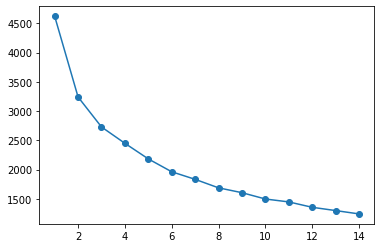

In [215]:
num_clusters = [i for i in range(1, 15)]
plt.plot(num_clusters, inertias, '-o')
plt.show()

In [216]:
model = KMeans(n_clusters=6, init='k-means++')
model.fit(X)
labels = model.predict(X)

In [217]:
print(labels)

[3 5 0 3 3 1 0 0 3 0 5 2 0 1 5 3 2 0 3 0 3 3 2 3 0 4 2 3 5 0 2 3 3 2 3 3 1
 0 0 0 2 0 0 3 3 5 5 1 5 4 3 3 4 3 3 0 3 3 5 3 3 4 3 0 5 3 4 2 0 5 5 4 3 3
 3 5 0 2 2 5 0 1 0 3 3 0 1 0 3 1 5 0 3 3 5 0 2 0 4 1 2 5 3 5 1 2 5 0 5 3 1
 4 3 0 3 3 0 0 4 4 2 3 5 4 1 0 3 0 5 3 0 1 2 3 2 2 1 0 3 0 0 5 0 0 3 0 1 5
 0 0 4 0 3 3 0 1 4 4 5 3 5 0 5 0 2 4 0 5 3 3 3 4 1 3 0 2 4 0 3 0 0 3 3 2 0
 5 3 5 0 3 3 0 2 0 1 3 4 1 5 2 3 5 2 2 2 3 2 2 3 3 5 1 2 5 2 0 0 3 0 3 3 0
 5 2 4 5 2 0 1 2 5 4 5 2 0 5 4 0 0 5 0 3 4 5 0 2 4 3 1 0 0 2 3 5 1 4 0 1 3
 0 5 4 1 0 3 5 1 4 3 2 0 3 5 0 3 3 0 0 0 3 5 5 5 3 2 4 2 0 0 3 1 3 0 5 2 0
 4 5 3 3 2 4 0 3 5 2 3 3 3 2 5 5 1 4 3 1 0 0 5 0 0 2 0 5 0 5 2 0 0 5 4 0 0
 5 3 3 2 5 2 4 5 5 0 3 0 2 3 3 1 0 1 0 4 1 0 3 2 3 3 1 1 1 1 0 2 0 0 1 3 0
 3 0 1 1 3 2 1 2 2 4 4 1 0 3 1 5 0 2 4 3 3 3 3 3 3 3 4 0 2 1 3 3 3 3 4 3 0
 3 3 4 1 4 4 2 3 3 3 0 4 3 4 4 4 0 3 2 4 0 5 2 5 3 0 2 2 5 4 1 5 3 1 3 0 5
 0 0 1 0 4 5 5 2 0 2 2 3 3 4 2 3 0 5 2 0 2 5 3 0 0 4 5 2 4 0 0 5 2 0 0 4 0
 5 1 5 3 4 0 0 0 3 2 3 4 

In [218]:
x = X[:,0]
y = X[:,1]
z = X[:,2]

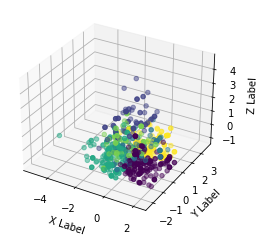

In [219]:
#fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=labels, alpha = 0.5)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [220]:
import ipyvolume as ipv
fig = ipv.figure()
ipv.scatter(x, y, z, size=1, marker="sphere")
ipv.show()

In [221]:
columns_to_normalize = ['Rating', 'avg_salary', 'age', 'avg_revenue', 'avg_size', 'desc_len']
new_df[columns_to_normalize] = new_df[columns_to_normalize].apply(lambda x: (x - x.mean()) / np.std(x))

In [222]:
test_df_ = new_df[['Rating', 'avg_salary', 'age', 'avg_revenue', 'avg_size', 'desc_len', 'private', 'python_', 'R_', 'spark_', 'aws_', 'excel_','analyst', 'data engineer', 'data scientist', 'director', 'manager',
       'mle', 'seniority']]

In [240]:
matrix = test_df_.to_numpy()

In [224]:
from kmodes.kprototypes import KPrototypes

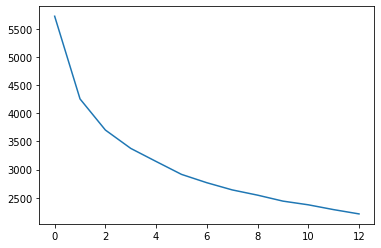

In [225]:
cost = []
for num_clusters in list(range(1,14)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(matrix, categorical=[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
    cost.append(kproto.cost_)
    
plt.plot(cost)

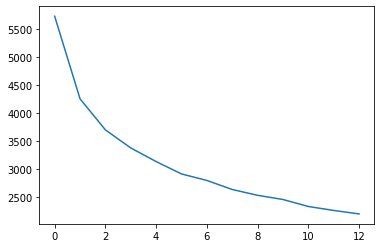

In [226]:
cost = []
for num_clusters in list(range(1,14)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang')
    kproto.fit_predict(matrix, categorical=[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
    cost.append(kproto.cost_)
    
plt.plot(cost)

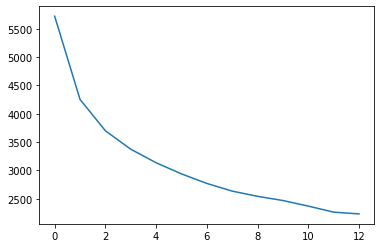

In [227]:
cost = []
for num_clusters in list(range(1,14)):
    kproto = KPrototypes(n_clusters=num_clusters, init='random')
    kproto.fit_predict(matrix, categorical=[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
    cost.append(kproto.cost_)
    
plt.plot(cost)

In [228]:
kproto = KPrototypes(n_clusters=5, init='Cao')
kproto.fit_predict(matrix, categorical=[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])

array([4, 2, 3, 4, 4, 0, 3, 3, 4, 3, 2, 0, 3, 0, 2, 3, 0, 2, 4, 2, 4, 4,
       0, 4, 3, 1, 0, 4, 2, 3, 0, 3, 4, 2, 4, 4, 0, 3, 3, 3, 0, 3, 3, 3,
       3, 2, 2, 0, 2, 1, 4, 4, 1, 3, 4, 3, 4, 4, 4, 4, 4, 1, 3, 3, 2, 4,
       1, 0, 3, 4, 2, 1, 4, 4, 4, 2, 3, 0, 0, 2, 3, 0, 2, 3, 3, 2, 0, 2,
       3, 0, 2, 3, 3, 4, 2, 3, 0, 3, 4, 0, 0, 2, 3, 2, 0, 0, 2, 3, 2, 4,
       0, 1, 4, 3, 4, 4, 2, 3, 1, 1, 0, 3, 2, 1, 0, 3, 3, 3, 2, 4, 3, 0,
       0, 3, 0, 0, 0, 3, 4, 3, 2, 2, 2, 3, 4, 3, 0, 2, 3, 2, 1, 3, 4, 4,
       2, 0, 1, 1, 2, 3, 2, 2, 4, 3, 0, 1, 2, 2, 4, 2, 4, 1, 0, 4, 3, 0,
       4, 3, 4, 3, 2, 3, 4, 0, 3, 2, 3, 2, 3, 4, 4, 3, 0, 3, 0, 4, 1, 1,
       2, 0, 4, 2, 0, 0, 0, 3, 0, 0, 3, 3, 2, 0, 0, 2, 4, 3, 3, 4, 3, 4,
       3, 2, 2, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 0, 2, 2, 1, 2, 3, 2, 3, 4,
       1, 2, 3, 0, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 2, 0, 4, 3, 2, 1, 0, 3,
       3, 2, 0, 1, 4, 0, 2, 4, 2, 2, 4, 4, 3, 2, 2, 4, 2, 4, 4, 4, 0, 1,
       0, 3, 2, 4, 0, 4, 3, 2, 0, 2, 1, 2, 4, 4, 0,

In [229]:
kproto.cluster_centroids_

[array([[-0.01783396,  0.15159837,  0.81183262,  1.70869087,  1.46359166,
          0.11958809],
        [-0.39684386, -0.15597997,  0.54861328, -0.26920348,  0.71829611,
          1.3483716 ],
        [ 0.66637059,  1.05878425, -0.60398334, -0.53815478, -0.66201867,
         -0.4814716 ],
        [ 0.57360649, -0.83867967, -0.3638629 , -0.63249336, -0.75741349,
         -0.0254224 ],
        [-1.11310048, -0.33777836, -0.12126654, -0.33897128, -0.4197249 ,
         -0.39744531]]),
 array([[0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.]])]

In [251]:
Y = np.array([[-0.39684386, -0.15597997,  0.54861328, -0.26920348,  0.71829611, 1.3483716, 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.]])
kproto.predict(Y, categorical=[6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])


array([1], dtype=uint16)